In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from PIL import Image
import os
import cv2
import os

In [2]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters = 16, kernel_size = (11, 11),padding = 'Same',
                 activation ='relu', input_shape=(350, 250, 3)),
  tf.keras.layers.MaxPooling2D(pool_size = 2),
  tf.keras.layers.Conv2D(filters = 32, kernel_size = (7, 7), padding = 'Same',
                 activation ='relu',),
  tf.keras.layers.MaxPooling2D(pool_size = 2),
  tf.keras.layers.Conv2D(filters = 32, kernel_size = (5, 5), padding = 'Same',
                 activation ='relu',),
  tf.keras.layers.MaxPooling2D(pool_size = 2),
  tf.keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), padding = 'Same',
                 activation ='relu',),
  tf.keras.layers.MaxPooling2D(pool_size = 2),
  tf.keras.layers.Conv2D(filters = 128, kernel_size = (2, 2), padding = 'Same',
                 activation ='relu',),
  tf.keras.layers.MaxPooling2D(pool_size = 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(4096, activation='relu'),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(2048, activation='relu'),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(4096, activation='relu'),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [3]:
model.load_weights('model-238-0.996245-0.997151-0.968750-0.700000.h5')

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


Using TensorFlow backend.


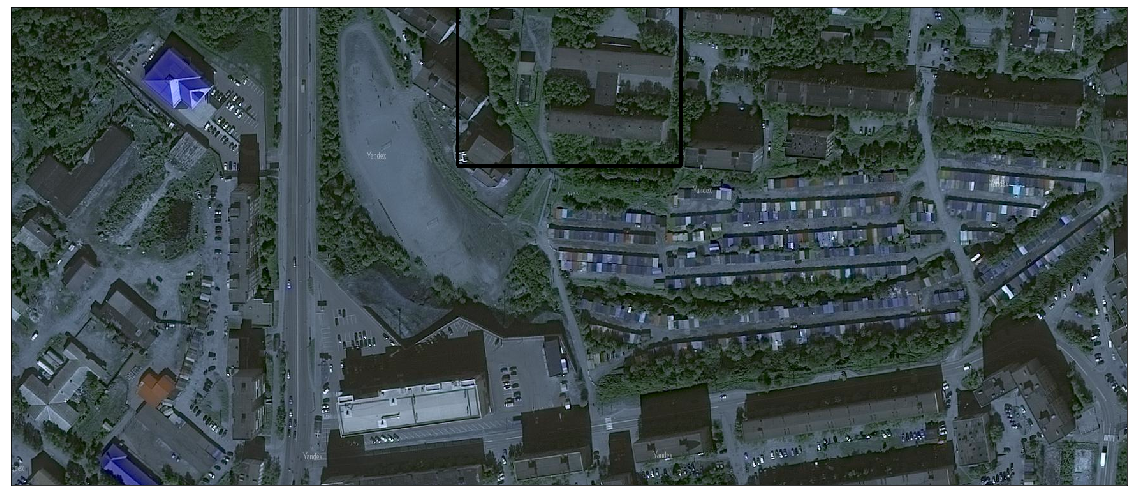

In [4]:
path = os.getcwd() + '/Data/Test'
image = Image.open(path + '/18.png')
cropped_image = image.crop((50,200,1800,950))
cropped_image = cropped_image.save(path + '/test.png')

def crop(image_path, save_path, coords):
    image = Image.open(image_path)
    cropped_image = image.crop(coords)
    cropped_image = cropped_image.save(save_path)
    
coords1 = (0,0,350,250)
coords2 = (350,0,700,250)
coords3 = (700,0,1050,250)
coords4 = (1050,0,1400,250)
coords5 = (1400,0,1750,250)
coords6 = (0,250,350,500)
coords7 = (350,250,700,500)
coords8 = (700,250,1050,500)
coords9 = (1050,250,1400,500)
coords10 = (1400,250,1750,500)
coords11 = (0,500,350,750)
coords12 = (350,500,700,750)
coords13 = (700,500,1050,750)
coords14 = (1050,500,1400,750)
coords15 = (1400,500,1750,750)

path = os.getcwd() + '/Data'
crop(path + '/Test/test.png', path + '/Test/grid_1.png', coords1)
crop(path + '/Test/test.png', path + '/Test/grid_2.png', coords2)
crop(path + '/Test/test.png', path + '/Test/grid_3.png', coords3)
crop(path + '/Test/test.png', path + '/Test/grid_4.png', coords4)
crop(path + '/Test/test.png', path + '/Test/grid_5.png', coords5)
crop(path + '/Test/test.png', path + '/Test/grid_6.png', coords6)
crop(path + '/Test/test.png', path + '/Test/grid_7.png', coords7)
crop(path + '/Test/test.png', path + '/Test/grid_8.png', coords8)
crop(path + '/Test/test.png', path + '/Test/grid_9.png', coords9)
crop(path + '/Test/test.png', path + '/Test/grid_10.png', coords10)
crop(path + '/Test/test.png', path + '/Test/grid_11.png', coords11)
crop(path + '/Test/test.png', path + '/Test/grid_12.png', coords12)
crop(path + '/Test/test.png', path + '/Test/grid_13.png', coords13)
crop(path + '/Test/test.png', path + '/Test/grid_14.png', coords14)
crop(path + '/Test/test.png', path + '/Test/grid_15.png', coords15)

from keras.preprocessing import image

result = np.zeros(15)
for i in range(1, 15):
    img = image.load_img(path + '/Test/grid_' + str(i) + '.png', target_size=(350, 250))
    img = np.expand_dims(img, axis=0)
    result[i] = model.predict_classes(img)
    
img = cv2.imread(path + '/Test/test.png')

if result[0] == 1:
    img = cv2.rectangle(img,coords1[0:2],coords1[2:4],(0,0,0),3)
if result[1] == 1:
    img = cv2.rectangle(img,coords2[0:2],coords2[2:4],(0,0,0),3)
if result[2] == 1:
    img = cv2.rectangle(img,coords3[0:2],coords3[2:4],(0,0,0),3)
if result[3] == 1:
    img = cv2.rectangle(img,coords3[0:2],coords3[2:4],(0,0,0),3)
if result[4] == 1:
    img = cv2.rectangle(img,coords5[0:2],coords5[2:4],(0,0,0),3)
if result[5] == 1:
    img = cv2.rectangle(img,coords6[0:2],coords6[2:4],(0,0,0),3)
if result[6] == 1:
    img = cv2.rectangle(img,coords7[0:2],coords7[2:4],(0,0,0),3)
if result[7] == 1:
    img = cv2.rectangle(img,coords8[0:2],coords8[2:4],(0,0,0),3)
if result[8] == 1:
    img = cv2.rectangle(img,coords9[0:2],coords9[2:4],(0,0,0),3)
if result[9] == 1:
    img = cv2.rectangle(img,coords10[0:2],coords10[2:4],(0,0,0),3)
if result[10] == 1:
    img = cv2.rectangle(img,coords11[0:2],coords11[2:4],(0,0,0),3)
if result[11] == 1:
    img = cv2.rectangle(img,coords12[0:2],coords12[2:4],(0,0,0),3)
if result[12] == 1:
    img = cv2.rectangle(img,coords13[0:2],coords13[2:4],(0,0,0),3)
if result[13] == 1:
    img = cv2.rectangle(img,coords14[0:2],coords14[2:4],(0,0,0),3)
if result[14] == 1:
    img = cv2.rectangle(img,coords15[0:2],coords15[2:4],(0,0,0),3)

plt.figure(figsize=(20,20))
plt.imshow(img)
plt.xticks([]), plt.yticks([])
plt.show()